# Cluster Analysis II


## What is Cluster Analysis?!

- **Cluster**: A collection of data objects
  - **similar** (or related) to one another within the same group
  - **dissimilar** (or unrelated) to the objects in other groups
- **Cluster analysis** (or clustering, data segmentation, ...)
  - Finding similarities between data according to the characteristics found in the data and grouping similar data objects into clusters
- **Unsupervised learning**: no predefined classes (i.e., learning by observations vs. learning by examples: supervised)
- Typical applications:
  - As a **stand-alone tool** to get insight into data distribution 
  - As a **preprocessing step** for other algorithms

## Clustering for Data Understanding and Applications!

- Biology: taxonomy of living things: kingdom, phylum, class, order, family, genus and species
- Information retrieval: document clustering
- Land use: Identification of areas of similar land use in an earth observation database
- Marketing: Help marketers discover distinct groups in their customer bases, and then use this knowledge to develop targeted marketing programs
- City-planning: Identifying groups of houses according to their house type, value, and geographical location
- Earth-quake studies: Observed earth quake epicenters should be clustered along continent faults
- Climate: understanding earth climate, find patterns of atmospheric and ocean
- Economic Science: market research

## Quality: What Is a Good Clustering?!

- A good clustering method will produce high quality clusters
  - **high intra-class similarity**: cohesive within clusters
  - **low inter-class similarity**: distinctive between clusters
- The quality of a clustering method depends on
  - the **similarity measure** used by the method 
  - its implementation, and
  - Its ability to discover some or all of the hidden patterns
- Measuring clustering quality is difficult:
  - in general, the **true clustering is not know**
    - there is no objective benchmark of the clustering
  - **similarity-based measures** might not suffice (e.g., curse of dimensionality)
  - perceived quality by the analyst is **highly subjective**

## Considerations for Cluster Analysis!

- Partitioning criteria
  - **Single level vs. hierarchical** partitioning (often, multi-level hierarchical partitioning is desirable)
- Separation of clusters
  - **Exclusive** (e.g., one customer belongs to only one region) **vs. non-exclusive** (e.g., one document may belong to more than one class)
- Similarity measure
  - **Distance-based** (e.g., Euclidian, road network, vector)  vs. **connectivity-based** (e.g., density or contiguity)
- Clustering space
  - **Full space** (often when low dimensional) **vs. subspaces** (often in high-dimensional clustering)


## Requirements and Challenges

- Scalability
  - Clustering all the data instead of only on samples
- Ability to deal with different types of attributes
  - Numerical, binary, categorical, ordinal, linked, and mixture of these 
- Constraint-based clustering
  - User may give inputs on constraints
  - Use domain knowledge to determine input parameters
- Interpretability and usability
- Others 
  - Discovery of clusters with arbitrary shape
  - Ability to deal with noisy data
  - Incremental clustering and insensitivity to input order
  - High dimensionality


## Major Clustering Approaches

- **Partitioning** approach: 
  - Construct various partitions and then evaluate them by some criterion, e.g., minimizing the sum of square errors
  - Typical methods: **k-means**, k-medoids, CLARANS
- **Hierarchical** approach: 
  - Create a hierarchical decomposition of the set of data (or objects) using some criterion
  - Typical methods: Diana, Agnes (**HAC**), BIRCH, CAMELEON
- **Density-based** approach: 
  - Based on connectivity and density functions
  - Typical methods: **DBSCAN**, OPTICS, DenClue

## Other Clustering Approaches

- **Grid-based** approach: 
  - based on a multiple-level granularity structure
  - Typical methods: STING, WaveCluster, CLIQUE
- **Model-based**: 
  - A model is hypothesized for each of the clusters and tries to find the best fit of that model to each other
  - Typical methods: EM, SOM, COBWEB
- **Frequent pattern-based**:
  - Based on the analysis of frequent patterns
  - Typical methods: p-Cluster
- **User-guided or constraint-based**: 
  - Clustering by considering user-specified or application-specific constraints
  - Typical methods: COD (obstacles), constrained clustering
- **Link-based clustering**:
  - Objects are often linked together in various ways
  - Massive links can be used to cluster objects: SimRank, LinkClus


## Hierarchical Clustering

- Use **distance/similarity matrix** as clustering criteria.  
  - The distance matrix $D$ has $D[i,j]$ being the distance between objects $i$ and $j$
  - The similarity matrix $S$ has $S[i,j]$ being the similarity between objects $i$ and $j$
- This method does not require the number of clusters $k$ as an input
- **Agglomerative** hierarchical clustering method uses a bottom-up strategy. 
  - Initially each object form its own cluster, which are iteratively merged until a single cluster becomes the hierarchy’s root.
- **Divisive** hierarchical clustering method employs a top-down strategy.
  - Initially all objects form a single cluster, which is recursively split into smaller clusters.


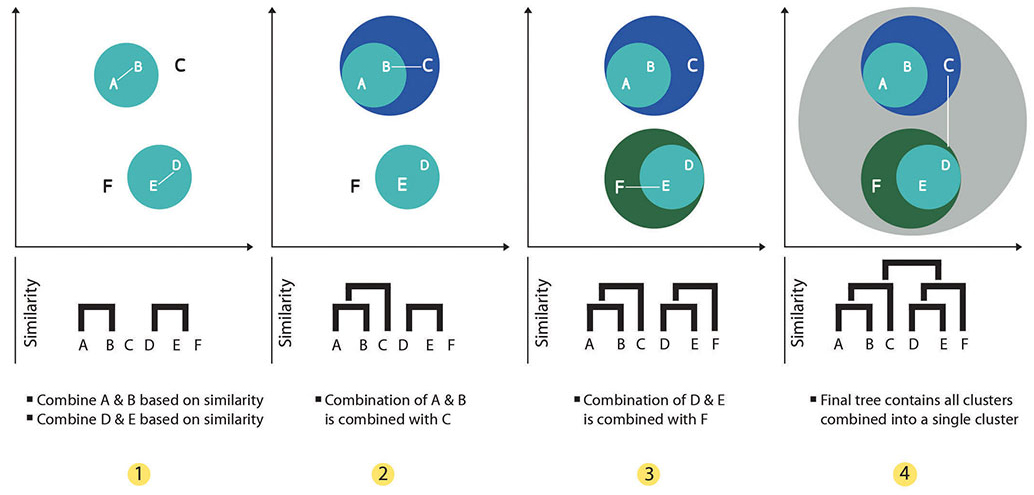

## Hierarchical Agglomerative Clustering Algorithm


<div class="alert alert-info">


**HAC Algorithm.**
1. *§ Initialize every single point as a cluster*
1. **for** $i=1\ldots |{\cal D}|$:
1. $\quad$ $C_i = \{o_i\}$
1. *§ set of clusters*
1. $\cal C = \bigcup_i \{C_i\}$ 
1. *§ Aggregation loop*
1. **while** $|{\cal C}|>1$:
1. $\quad$ *§ Find closest cluster pair*
1. $\quad$ $C_i, C_j = \arg\min_{C_x, C_y} D(C_x, C_y)$
1. $\quad$ *§ Replace* $C_i$ and $C_j$ with the merge of the two
1. $\quad$ $C_{new} = C_i\cup C_j$
1. $\quad$ ${\cal C} = (({\cal C} \setminus \{C_i\}) \setminus \{C_j\}) \cup \{C_{new}\}$
</div> 

This is usually implemented through a distance matrix $D$ of size $|{\cal D}|\times |{\cal D}|$:
 - initially this is initialized as $D[i,j] = dist(o_i, o_j)$ (e.g., Euclidean)
 - when merging $C_i$ with $C_j$ ($i<j$):
   - the column and the row corresponding to cluster $C_j$ are invalidated, e.g., by marking $\forall k, D[j,k] = +\infty$ and $\forall k, D[k,j] = +\infty$
   - the column/row corresponding to cluster $C_i$ is used for the new cluster $C_{new}=C_i\cup C_j$, i.e., by setting $\forall k, D[i,k] = sim(C_{new}, C_k)$ and $\forall k, D[k,i] = sim(C_k, C_{new})$
 - note that, as similarity measures are typically symmetric, a upper/lower triangular matrix would suffice.

The key operation is how to compute similarity between clusters. Algorithms differs on the similarity function they use.

Clusters are also determined:
 - by early stopping the merge when $K$ clusters are created
 - by quitting the algorithm when all clusters are less similar than a user given threshold 
 
Scikit-Learn implementation:
 - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering

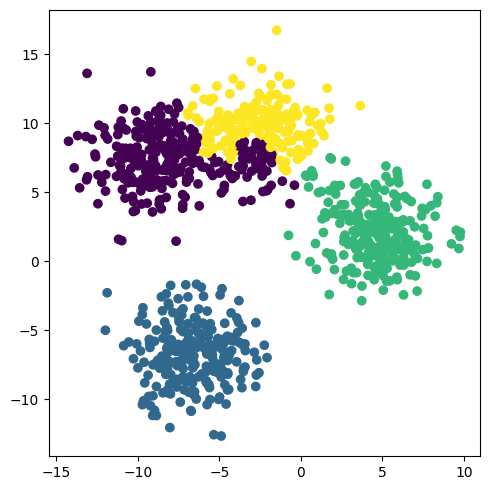

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

N_SAMPLES = 1000
N_CENTERS = 4

# create a random dataset
X, labels_true = make_blobs(n_samples=N_SAMPLES, 
                            centers=N_CENTERS, 
                            cluster_std=2.0,
                            random_state=42)

# run hierarchical clustering
h_clust = AgglomerativeClustering( n_clusters=N_CENTERS, 
                                   linkage="complete")
clusters = h_clust.fit_predict(X)

# plot clusterd points
fig, ax = plt.subplots(figsize=(5,5), tight_layout=True)
ax.scatter(X[:,0], X[:,1], c=clusters);


In [2]:
print (clusters)

[0 1 1 2 2 1 2 1 1 2 2 0 0 1 1 1 3 3 3 2 2 0 0 0 2 2 3 3 1 2 1 1 1 3 3 0 1
 2 0 0 2 1 2 0 2 0 0 2 0 2 1 3 2 0 3 0 3 3 3 1 1 3 1 0 2 3 1 1 2 3 0 3 2 1
 2 0 2 0 2 3 1 0 3 3 2 0 1 1 0 3 3 2 2 2 0 2 0 3 2 1 2 0 0 0 3 2 2 3 1 3 3
 1 2 2 2 2 1 0 1 2 0 1 0 2 0 1 2 0 1 2 3 1 2 0 2 3 3 1 2 2 3 0 0 0 0 2 2 0
 3 0 0 0 1 1 3 2 3 2 2 0 1 3 2 1 2 3 2 1 0 1 2 3 3 2 0 0 1 0 1 0 2 2 3 1 3
 1 2 0 3 1 2 3 2 2 3 0 1 1 1 0 0 1 2 0 2 2 1 0 2 1 1 0 1 1 2 3 1 0 0 2 0 0
 1 0 0 0 2 1 1 3 3 1 3 0 1 1 0 1 1 2 1 0 1 2 0 3 2 3 2 2 2 2 0 2 2 1 3 1 1
 2 2 2 0 2 0 0 1 2 3 0 2 2 2 1 0 0 2 3 1 2 0 1 0 2 1 3 3 1 0 0 0 0 1 1 1 3
 1 1 1 0 1 0 1 0 0 1 0 2 0 0 1 0 0 2 1 0 2 3 0 0 1 1 1 2 0 1 3 1 0 2 1 1 0
 3 1 3 0 2 0 2 0 1 1 2 0 2 0 0 3 3 3 3 3 2 3 3 1 2 0 0 2 1 1 2 0 2 0 0 0 1
 2 2 2 2 3 2 3 1 2 3 1 2 0 2 2 0 3 3 1 0 1 3 0 3 0 0 1 2 2 2 3 0 3 2 2 0 2
 3 3 0 2 3 0 1 0 1 1 3 0 2 3 2 3 3 3 0 1 0 2 1 3 3 0 3 0 1 0 1 1 0 0 0 0 2
 0 3 2 2 1 0 0 0 2 0 0 0 1 1 2 0 2 2 2 3 2 2 1 1 2 3 0 2 2 0 0 1 0 3 2 3 3
 2 0 1 2 3 2 1 0 2 3 1 3 

## How would you estimate clusters similarity?

### Definition of Linkage Measures

- Typical cluster similarity measures are the following:
  
  
  - **Single**: minimum distance $\textsf{dist}(C_i, C_j) = \min\limits_{x\in C_i, y\in C_j} \textsf{dist}(x,y)$
    - Cons:  it overestimates similarity, and it may produce chaining
  
  
  - **Complete**: maximum distance $\textsf{dist}(C_i, C_j) = \max\limits_{x\in C_i, y\in C_j} \textsf{dist}(x,y)$
    - Cons: It underestimates similarity, favors globular clusters


  - **Average**: average distance $\textsf{dist}(C_i, C_j) = \frac{1}{|C_i||C_j|}\sum\limits_{x\in C_i, y\in C_j} \textsf{dist}(x,y)$
    - Pros: In the middle of the other above two  


  - **Centroid/Medoid**: distance between centroids/medoids $\textsf{dist}(C_i, C_j) = \textsf{dist}(o_i, o_j)$ 
    - Pros: Fast!


  - **Ward**: measures the increase in SSE (with respect to the centroid) when merging two clusters
    - Pros: similar objective of k-means

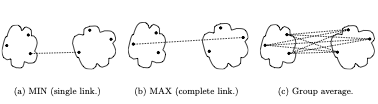

### Comparison of Linkage Measures

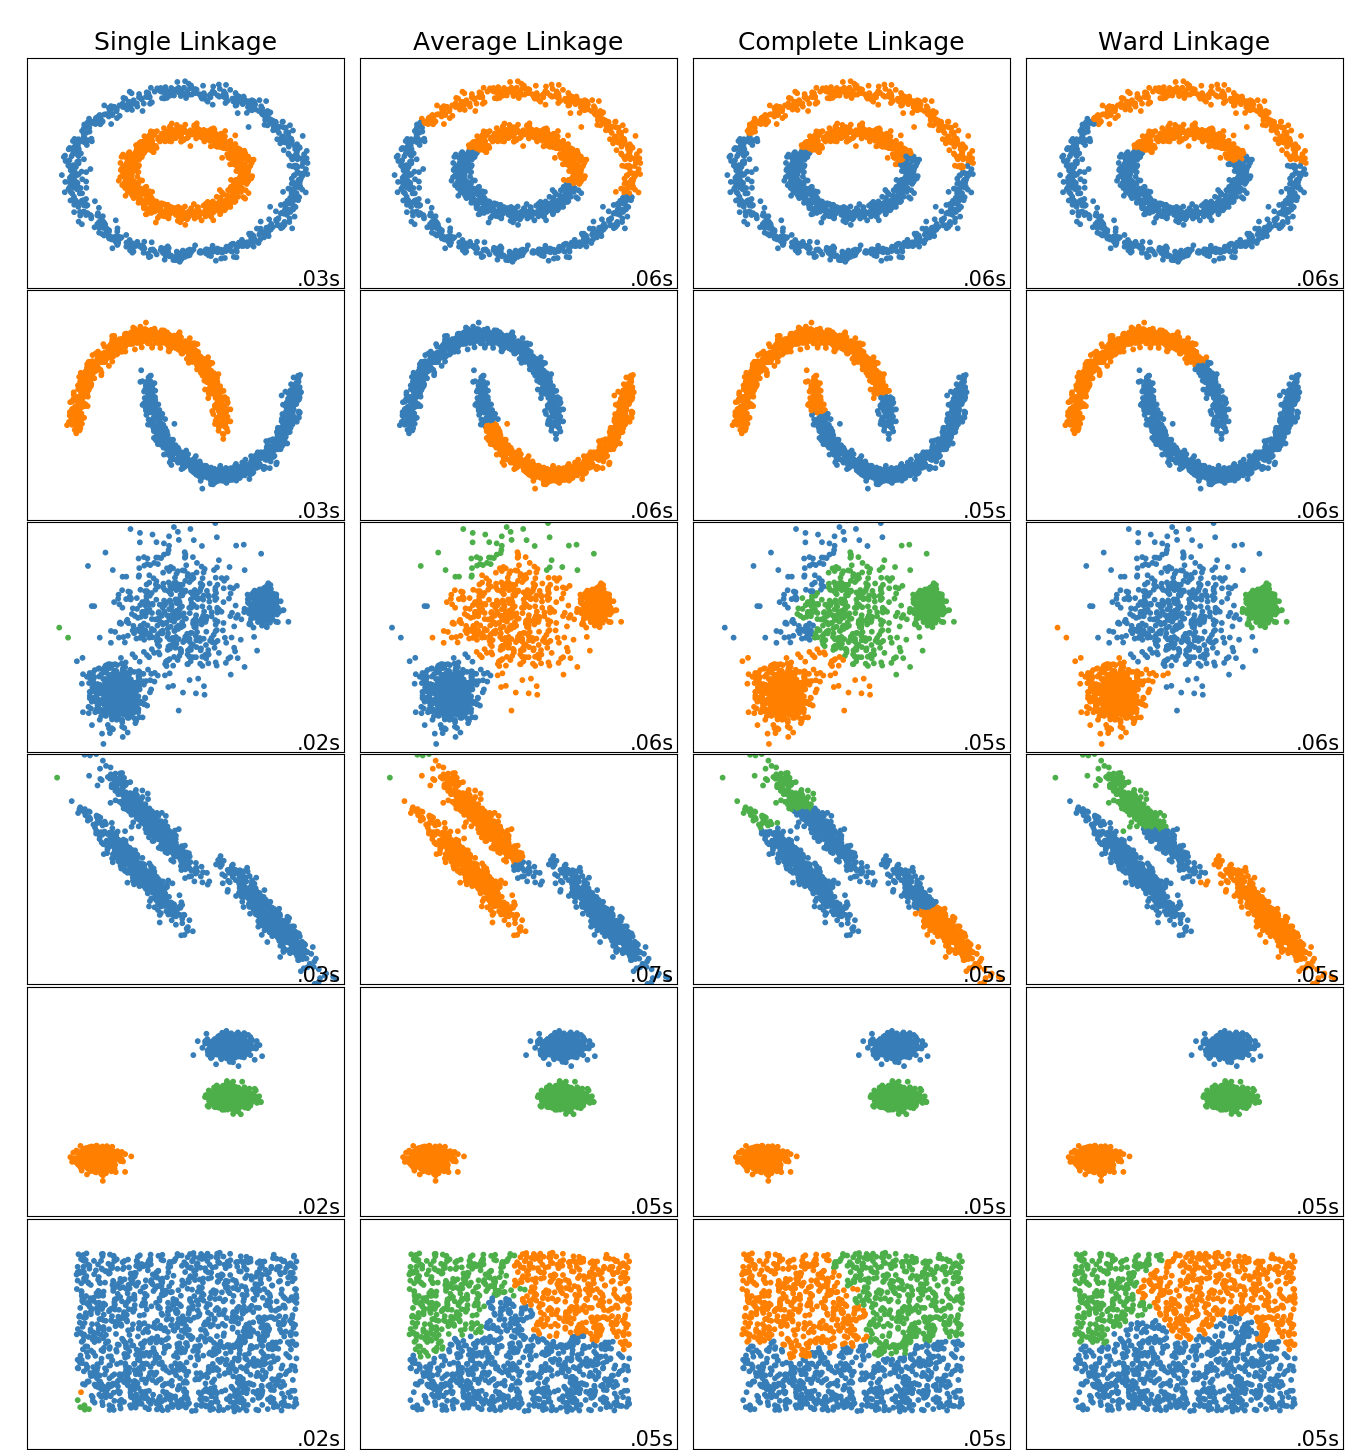

---

## Computational complexity


<div class='alert alert-danger'>

**Note:** This section is not entirely covered in the book.

</div>


Complexity is $O(n^3)$, for the naive implementation, $O(n^2\log n)$ if min-heaps are used, and $O(n^2)$ for the single linkage case.

In the general case $O(n^3)$:
 - compute the $n^2$ similarities {$O(n^2)$}
 - there are $n$ steps
 - each step requires:
    - finding the minimum in $n^2$ elements {$O(n^2)$}
    - computing distance between the new cluster and $n$ other clusters/points {depends on the measure}
    - updating $n$ entries of the similarity matrix
    

A better implementation uses a min-heap for each object to store pair-wise distances and it costs $O(n^2\log n)$:
 - compute the $n^2$ similarities {$O(n^2)$}
 - for each object, create a min-heap to store distances to the other $n$ objects {$O(n\cdot n\log n)$}
 - there are $n$ steps
 - each step requires:
    - finding the minimum among the min-heaps and removing it {$O(n+\log n)$}
    - computing distance between the new cluster and $n$ other clusters/points
    - inserting the new $n$ similarities into the various min-heaps with cost $O(n\log n)$

Single linkage can be implemented efficiently in $O(n^2)$:
 - this is because distances always decrease
 - compute the $n^2$ similarities {$O(n^2)$}
 - For each point we store the closest other point and its distance as a list $V$ of pairs (distance, id) of size $n$
 - there are $n$ steps
 - each step requires:
    - finding the smallest distance in $V$ {$O(n)$}
    - update the distance matrix by computing distances between the new cluster and $n$ other clusters/points {$O(n)$}
    - updating the similarities stored in $V$
    - see: https://sites.cs.ucsb.edu/~veronika/MAE/summary_SLINK_Sibson72.pdf
    
---

## Dendrogram with SciPy

"SciPy is a collection of mathematical algorithms and convenience functions built on the Numpy extension of Python."

https://www.scipy.org/

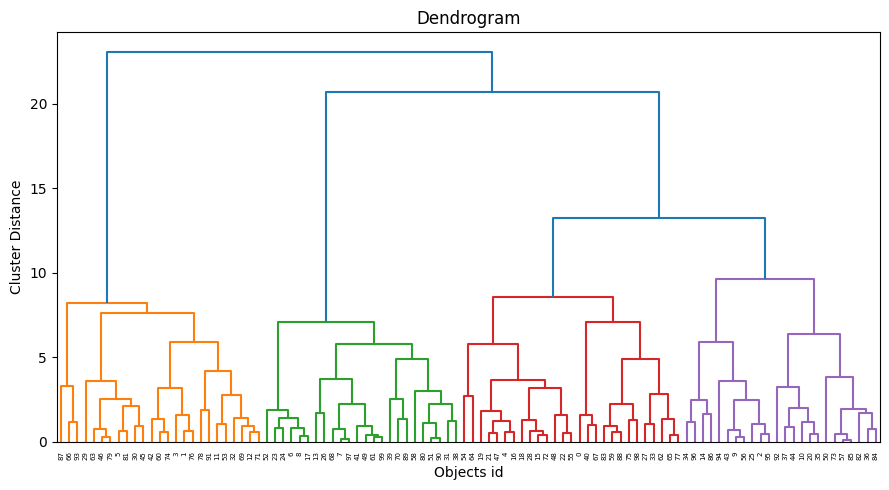

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import linkage, dendrogram

N_SAMPLES = 100
N_CENTERS = 4

# create a random dataset
X, labels_true = make_blobs(n_samples=N_SAMPLES, 
                            centers=N_CENTERS, 
                            cluster_std=2.0,
                            random_state=42)

# run the clustering
Z = linkage(X, method="complete")

# plot the dendrogram
fig, ax = plt.subplots(figsize=(9,5), tight_layout=True)
dendrogram(Z, color_threshold=10)
ax.set_ylabel("Cluster Distance")
ax.set_xlabel("Objects id")
ax.set_title("Dendrogram");

#### Exercise: compare k-means and hierarchical on the digits dataset

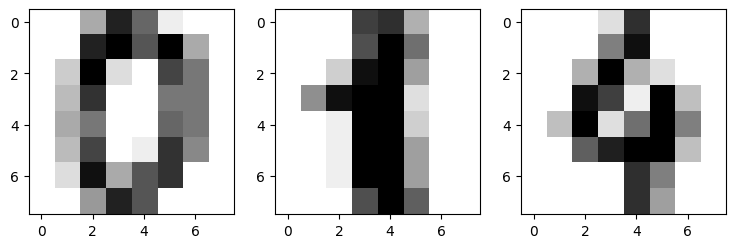

In [4]:
import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()
images = digits.images

fig, axs = plt.subplots(ncols=3, figsize=(9,3))
axs[0].imshow(images[0], cmap='gray_r')
axs[1].imshow(images[1], cmap='gray_r')
axs[2].imshow(images[100], cmap='gray_r');

In [5]:
aux = images.reshape( (-1, 64) )
aux.shape

(1797, 64)

In [6]:
from sklearn.cluster import AgglomerativeClustering

# run hierarchical clustering
h_clust = AgglomerativeClustering( n_clusters=10, 
                                   linkage="complete")
clusters = h_clust.fit_predict(aux)

print (clusters)

[1 0 0 ... 0 3 0]


In [7]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [8]:
clusters

array([1, 0, 0, ..., 0, 3, 0])

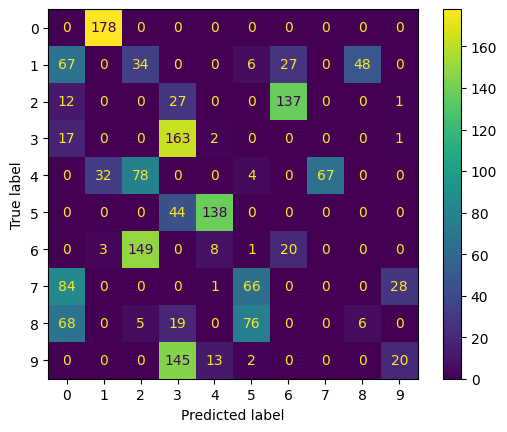

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true=digits.target, y_pred=clusters);

In [10]:
digits.target[ clusters==1 ]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0,
       0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 4,
       6, 0, 6, 0, 4, 0, 0, 0, 0, 0, 4, 6, 4, 0, 0, 0, 4, 4, 0, 4, 4, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0,
       4, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0,
       0, 4, 4, 0, 0, 0, 4, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])